#Task 1: EDA and Preprocessing of Complaint Narratives

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load the Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Week5/Data (1)/complaints.csv")
df.head()

/tmp/ipython-input-3-143138166.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Week5/Data (1)/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


 Initial Data Info & Nulls

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,0
Date received,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,839522
Consumer complaint narrative,6629041
Company public response,4770207
Company,0
State,54516
ZIP code,30228


 Distribution of Complaints by Product

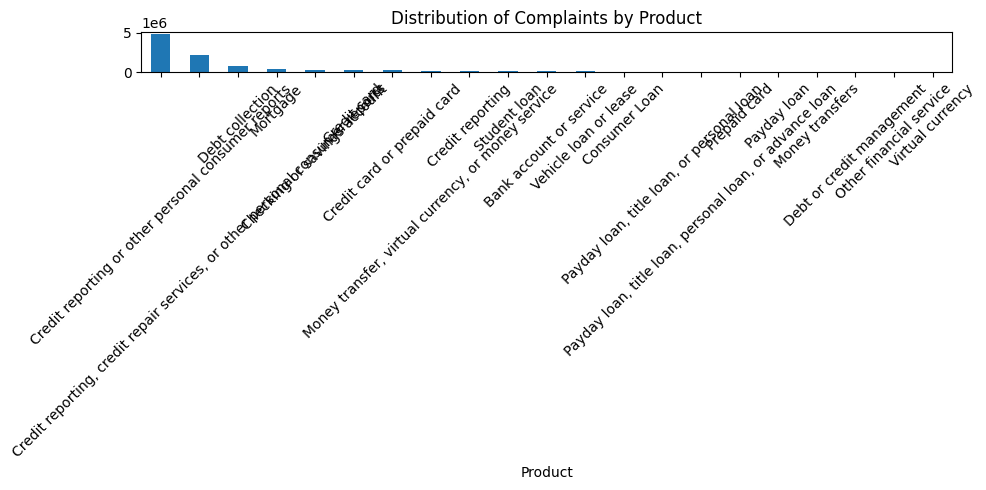

In [5]:
plt.figure(figsize=(10, 5))
df['Product'].value_counts().plot(kind='bar')
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📏 Analyze Narrative Lengths

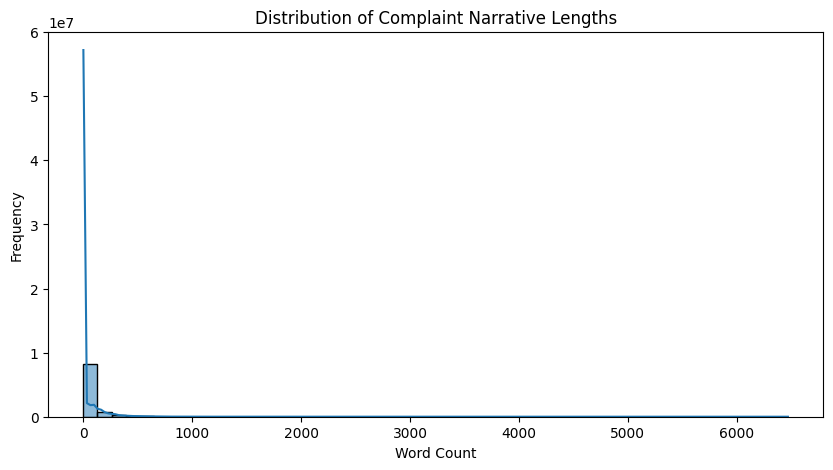

Shortest narrative: 1
Longest narrative: 6469


In [6]:
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

print("Shortest narrative:", df['narrative_length'].min())
print("Longest narrative:", df['narrative_length'].max())

## ❓ Number of Complaints With and Without Narratives

In [7]:
total = len(df)
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = total - with_narrative

print(f"Total complaints: {total}")
print(f"With narratives: {with_narrative}")
print(f"Without narratives: {without_narrative}")

Total complaints: 9609797
With narratives: 2980756
Without narratives: 6629041


## 🔍 Filter for Selected Product Categories

In [8]:
products_of_interest = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfers'
]

filtered_df = df[df['Product'].isin(products_of_interest)]
filtered_df = filtered_df.dropna(subset=['Consumer complaint narrative'])

## 🧹 Clean Complaint Narratives

In [9]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

 Save the Cleaned Dataset

>





In [10]:
filtered_df.to_csv("/content/drive/MyDrive/Week5/filtered_complaints.csv", index=False)
print("✅ Cleaned dataset saved to data/processed/filtered_complaints.csv")

✅ Cleaned dataset saved to data/processed/filtered_complaints.csv
